# **🔍 Coffee Shop Sales Insights**

### ***Uncovering sales drivers through visual and statistical analysis***

## 📄 Project Overview
### **1. Abstract**
This project presents an in-depth exploratory data analysis (EDA) of a coffee shop's transactional sales data from the year 2023. The primary aim of this analysis is to extract meaningful business insights that can assist in strategic planning and operational improvement. The dataset includes rich information such as transaction dates, times, store locations, product details, prices, quantities sold, and revenues generated. By cleaning and preparing the data, generating new temporal features (like hour, day, and month), and applying various visual and statistical techniques, we uncover patterns in customer behavior, sales trends, and product performance. This analysis ultimately helps in identifying top-selling products, high-performing stores, peak business hours, and revenue-driving categories. The insights gained from this project can guide marketing, inventory management, pricing strategy, and customer engagement efforts for the coffee shop.

### **2. Objective**
The key objective of this project is to explore and understand the coffee shop's sales data with a focus on identifying trends and actionable insights. Specifically, the analysis aims to:

  Understand sales distribution across different months, days, and hours to identify peak and off-peak periods.

  Compare the performance of each store location in terms of total sales, transaction volume, and revenue.

  Identify the most frequently sold product categories and product types, and evaluate their contribution to overall revenue.

  Examine the distribution of transaction quantities to understand common customer purchase behaviors.

  Explore pricing patterns and detect whether certain product types are more premium or budget-friendly.

  Recommend data-driven strategies for optimizing product offerings, promotions, and resource allocation based on store- and time-specific performance.

### **3. Project Information**
This section provides a summary of the technical and contextual information used in this analysis.

**Project Name:** Coffee Shop Sales Analysis

**Dataset Source:** Internal transactional records from a multi-location coffee shop chain for the year 2023

**Time Period Covered:** January 2023 to June 2023

**Tools and Technologies Used:**

Python for programming and data analysis

Pandas for data manipulation and aggregation

Matplotlib and Seaborn for data visualization

NumPy for numerical operations

Warnings Library to suppress non-critical warnings for cleaner outputs

***Key Variables in the Dataset:***

**store_location:** Location where the transaction took place

**transaction_date and transaction_time:** When the purchase was made

**transaction_qty:** Number of items sold per transaction

**unit_price:** Price per item

**product_category, product_type, product_detail:** Product information

***Engineered Features:***

year, month, day, and hour were derived from timestamp columns to facilitate time-based analysis.

Total revenue was computed by multiplying transaction_qty with unit_price.

***Data Cleaning & Preparation:***

Removed unnecessary columns such as transaction_id, store_id, and product_id.

Handled missing values and duplicates.

Dropped product_detail as it was found to be redundant.

This foundational work sets the stage for a comprehensive understanding of the coffee shop's operational and financial dynamics.

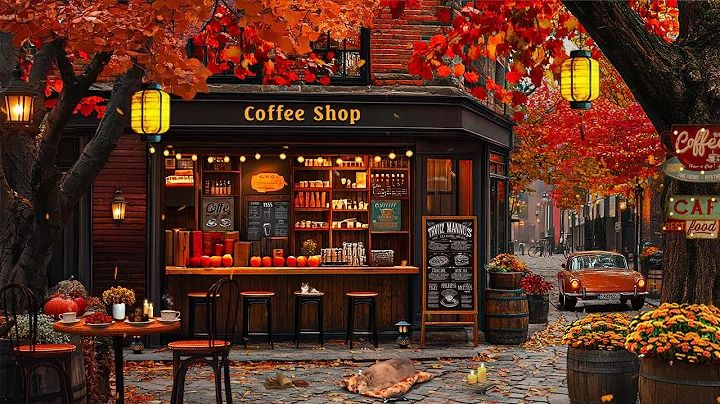

## **Loading Data & Libraries**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# set style of visualization
sns.set_style("darkgrid")
sns.set_palette("RdBu")

Loads all required libraries and disables warnings for a cleaner output and Sets consistent Seaborn styling and color palette for all plots.

In [ ]:
data = pd.read_excel("/content/Coffee Shop Sales.xlsx")

 Reads the Excel dataset into a Pandas DataFrame.

## **Initial Data Exploration**

In [ ]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [ ]:
data.shape

(149116, 11)

In [ ]:
data.isna().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [ ]:
data.duplicated().any()

np.False_

Quick overview of the dataset's structure:

First rows

Shape (rows, columns)

Null values

Column data types

Duplicate records check

## **Unique Values in Each Column**

In [ ]:
# see unique values in each column

# 1- create new data frame with number of unique value in each column
columnValue = data.nunique().reset_index()

# 2- rename column name
columnValue.rename(columns = {"index" : "Column _name", 0 : "Uniue values"}, inplace = True)

# 3- see columns and number of unique values of each
columnValue

,Column _name,Uniue values
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


## **Descriptive Statistics**

In [ ]:
data.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [ ]:
# see quick info of categorical data

data.describe(include = object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


Gives statistical summaries for numeric and categorical columns.

## **Dropping Unnecessary**

In [ ]:
data.drop(columns = ["transaction_id", "store_id", "product_id"], inplace = True)

## **Custom Plot Functions**

**Count Plot for Categorical Columns**

In [ ]:
# create function to visualized categorical column using count plot

def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):
    """
    1) input : x_axis, column name, data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) use bar_label to show frequency of each unique values above each column in graph
    5) top parameter i use it to specify indexes i want to see it
    """
    if x_axis: # if we neet to visualized in x-axis
        order = data[x_axis].value_counts().iloc[:top].index

    else : # if we neet to visualized in y-axis
        order = data[y_axis].value_counts().iloc[:top].index

    graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()

**Pie Plot for Categorical Columns**

In [ ]:
# create function that visualized categorical column using pie plot

def pie_plot(column_name, explodeIndex = None):
    """
    1) input : column name, column data type must be object or categorical
    2) explodeIndex, is the index i need to explode it
    2) output : circle chart that shows size of each unique values and percentage
    """
    # Create explode list with zeros of size equal to the number of unique values
    explodeList = [0] * data[column_name].nunique()

    # Check and set explodeIndex value
    if explodeIndex is not None:
        explodeList[explodeIndex] = 0.1

    # Create pie plot
    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%",  explode = explodeList)
    plt.show()

Discovering transaction_date column

In [ ]:
data["transaction_date"].unique()[:25]

<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00', '2023-01-11 00:00:00', '2023-01-12 00:00:00',
 '2023-01-13 00:00:00', '2023-01-14 00:00:00', '2023-01-15 00:00:00',
 '2023-01-16 00:00:00', '2023-01-17 00:00:00', '2023-01-18 00:00:00',
 '2023-01-19 00:00:00', '2023-01-20 00:00:00', '2023-01-21 00:00:00',
 '2023-01-22 00:00:00', '2023-01-23 00:00:00', '2023-01-24 00:00:00',
 '2023-01-25 00:00:00']
Length: 25, dtype: datetime64[ns]

## **Date and Time Feature Engineering**

In [ ]:
# add new column year
data["year"] = data["transaction_date"].dt.year

# add new column month
data["month"] = data["transaction_date"].dt.month_name()

# add new column day
data["day"] = data["transaction_date"].dt.day_name()

Extracts year, month name, and day name from transaction date.

In [ ]:
data["year"].unique()

array([2023], dtype=int32)

In [ ]:
data["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
data["day"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

## **Time-Based Sales Analysis**

📝Sales exclusively from 2023.

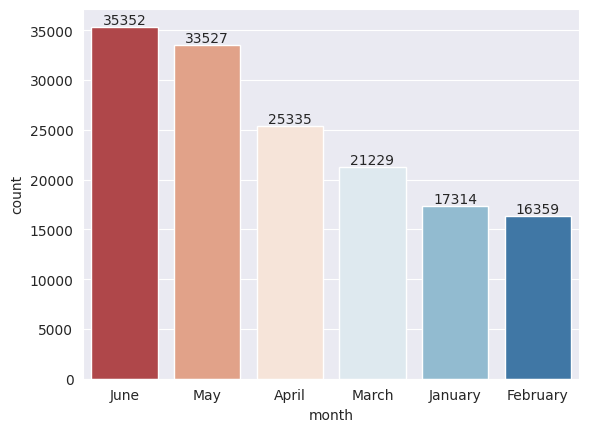

In [ ]:
count_plot(x_axis = "month") # call function i created

📝 Most sales within a six-month period

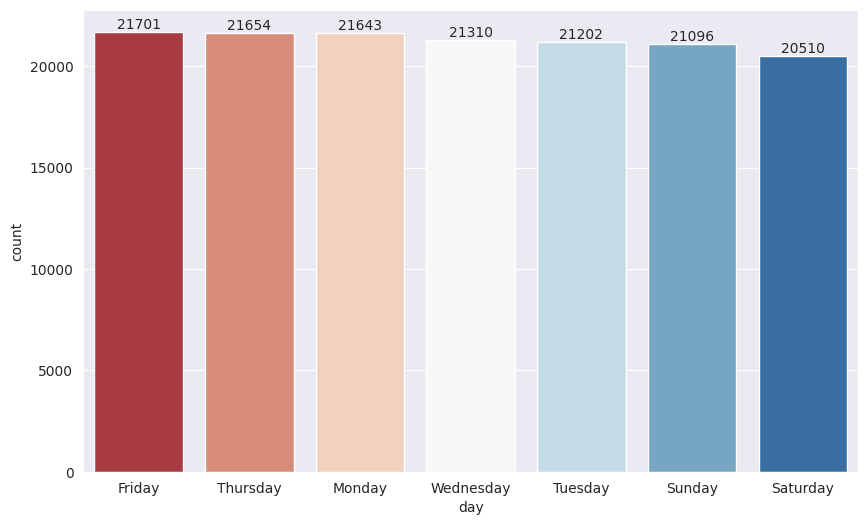

In [ ]:
plt.figure(figsize = (10,6))
count_plot(x_axis = "day")# call function i created

In [ ]:
data.drop(columns = "transaction_date", inplace = True)

In [ ]:
data["transaction_time"].unique()[:50]

array([datetime.time(7, 6, 11), datetime.time(7, 8, 56),
       datetime.time(7, 14, 4), datetime.time(7, 20, 24),
       datetime.time(7, 22, 41), datetime.time(7, 25, 49),
       datetime.time(7, 33, 34), datetime.time(7, 39, 13),
       datetime.time(7, 39, 34), datetime.time(7, 43, 5),
       datetime.time(7, 44, 35), datetime.time(7, 45, 51),
       datetime.time(7, 48, 19), datetime.time(7, 52, 36),
       datetime.time(7, 59, 58), datetime.time(8, 0, 18),
       datetime.time(8, 0, 39), datetime.time(8, 11, 45),
       datetime.time(8, 17, 27), datetime.time(8, 24, 26),
       datetime.time(8, 29, 38), datetime.time(8, 31, 23),
       datetime.time(8, 33, 8), datetime.time(8, 35, 3),
       datetime.time(8, 41, 57), datetime.time(8, 52, 3),
       datetime.time(8, 52, 32), datetime.time(8, 54, 33),
       datetime.time(8, 56, 27), datetime.time(8, 57, 46),
       datetime.time(8, 58, 55), datetime.time(9, 0, 12),
       datetime.time(9, 0, 24), datetime.time(9, 7, 13),
       da

Extract some information such as hour

In [ ]:
# add new column hour

data["hour"] = data["transaction_time"].apply(lambda x : x.hour)

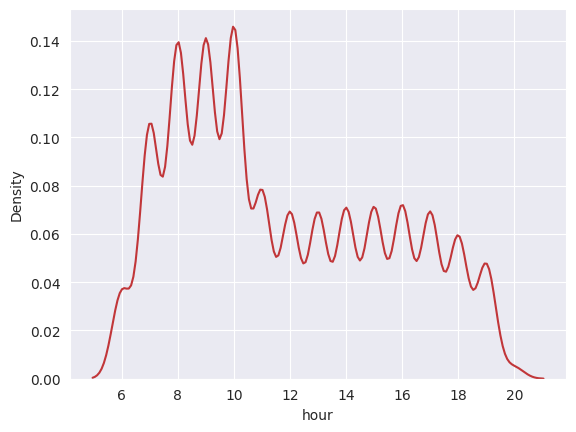

In [ ]:
sns.kdeplot(data["hour"])
plt.show()

Peak sales hours are between 8 AM and 11 AM.

Activity begins around 6 AM and drops significantly after 7 PM.

A noticeable density drop after 11 AM, followed by consistent but lower activity throughout the day.

Minor oscillations in afternoon suggest moderate but stable sales.

In [ ]:
# now i will drop  "transaction_date" column

data.drop(columns = "transaction_time", inplace = True)

Removes time column once hour is extracted.

Discovering transaction_qty column

In [ ]:
# see unique values

data["transaction_qty"].unique()

array([2, 1, 3, 4, 8, 6])

## **Univariate Analysis for Key Columns**

**Transaction Quantity:**

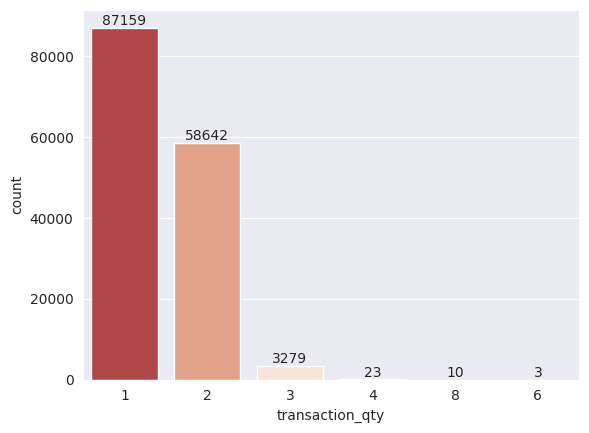

In [ ]:
# see number of sales quantity

count_plot(x_axis = "transaction_qty") # call function i create it in cell 12

Most transactions involve 1 or 2 items, with single-item purchases dominating the sales.
Higher quantity purchases are rare, indicating a strong preference for small, quick orders.

**Store Locations:**

In [ ]:
# see unique values

data["store_location"].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

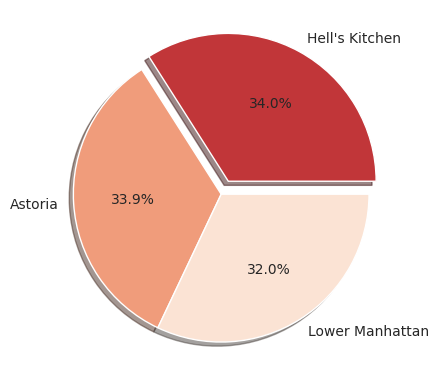

In [ ]:
# see number of sales in each store

pie_plot(column_name = "store_location", explodeIndex = 0)

Sales are fairly evenly split across stores, with Hell's Kitchen slightly leading at 34%.
Astoria (33.9%) and Lower Manhattan (32%) follow closely, showing balanced performance among locations.

**Unit Price:**

In [ ]:
# see unique values

data["unit_price"].unique()

array([ 3.  ,  3.1 ,  4.5 ,  2.  ,  4.25,  3.5 ,  2.55,  3.75,  2.5 ,
        4.75,  3.25,  4.  ,  2.2 ,  2.45,  0.8 ,  8.95, 21.  , 28.  ,
        6.4 , 19.75, 12.  , 18.  ,  9.5 , 10.  , 20.45,  9.25, 22.5 ,
       14.75,  7.6 , 14.  , 10.95, 13.33, 15.  ,  4.38,  4.06,  5.63,
        4.69, 45.  , 23.  ,  2.1 ,  2.65])

<Axes: ylabel='unit_price'>

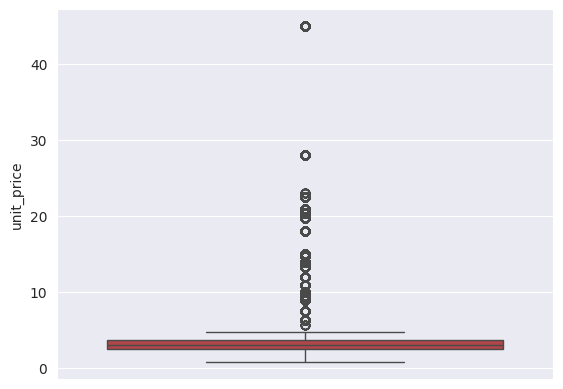

In [ ]:
# see 5 number summary to check outliers

sns.boxplot(y = "unit_price", data = data)

One might assume the presence of outliers, but such variations are expected in different types of coffee

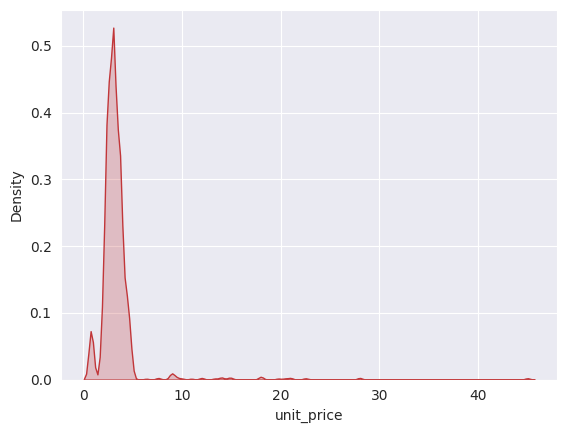

In [ ]:
# see distribution

sns.kdeplot(x = data["unit_price"], fill = True)
plt.show()

Price distribution is positively skewed, We understand from this that most products are priced between 2 and 6 dollars, with a sharp peak in this range.
Higher-priced items are rare, indicating a budget-friendly product lineup with a few premium options.

**Product Categories:**

In [ ]:
# see unique values

data["product_category"].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

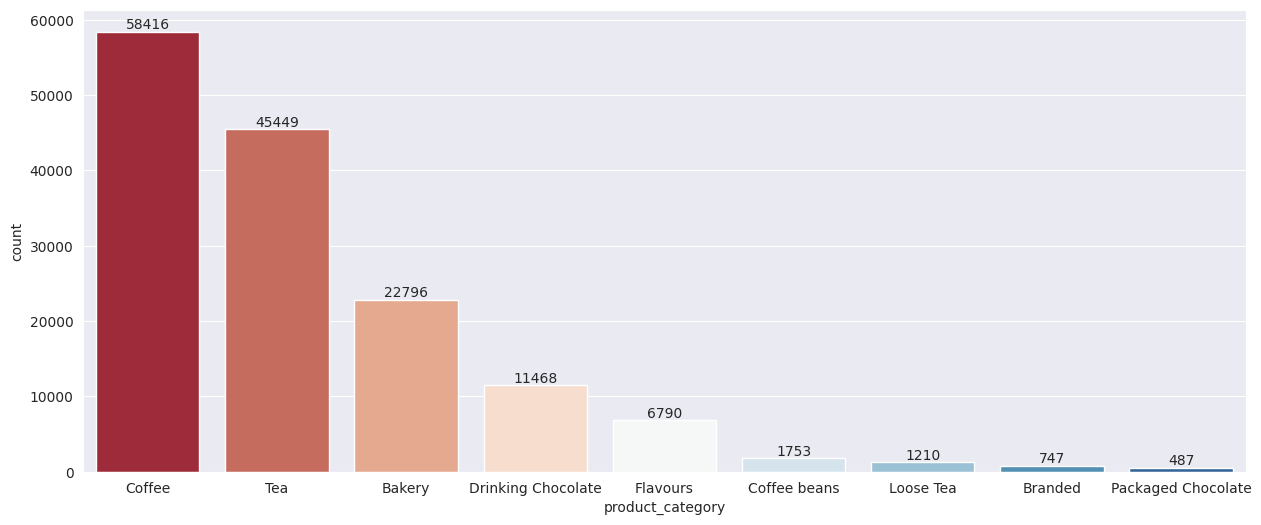

In [ ]:
# see most common category

# set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 12
count_plot(x_axis = "product_category")

Coffee is the top-selling category with 58,416 sales, followed by Tea (45,449) and Bakery (22,796).
Other categories like Chocolate, Flavours, and Beans have much lower sales, showing strong customer preference for beverages and baked goods.

Discovering product_type column

In [ ]:
# see unique values

data["product_type"].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

## **Detailed Product Type Analysis**

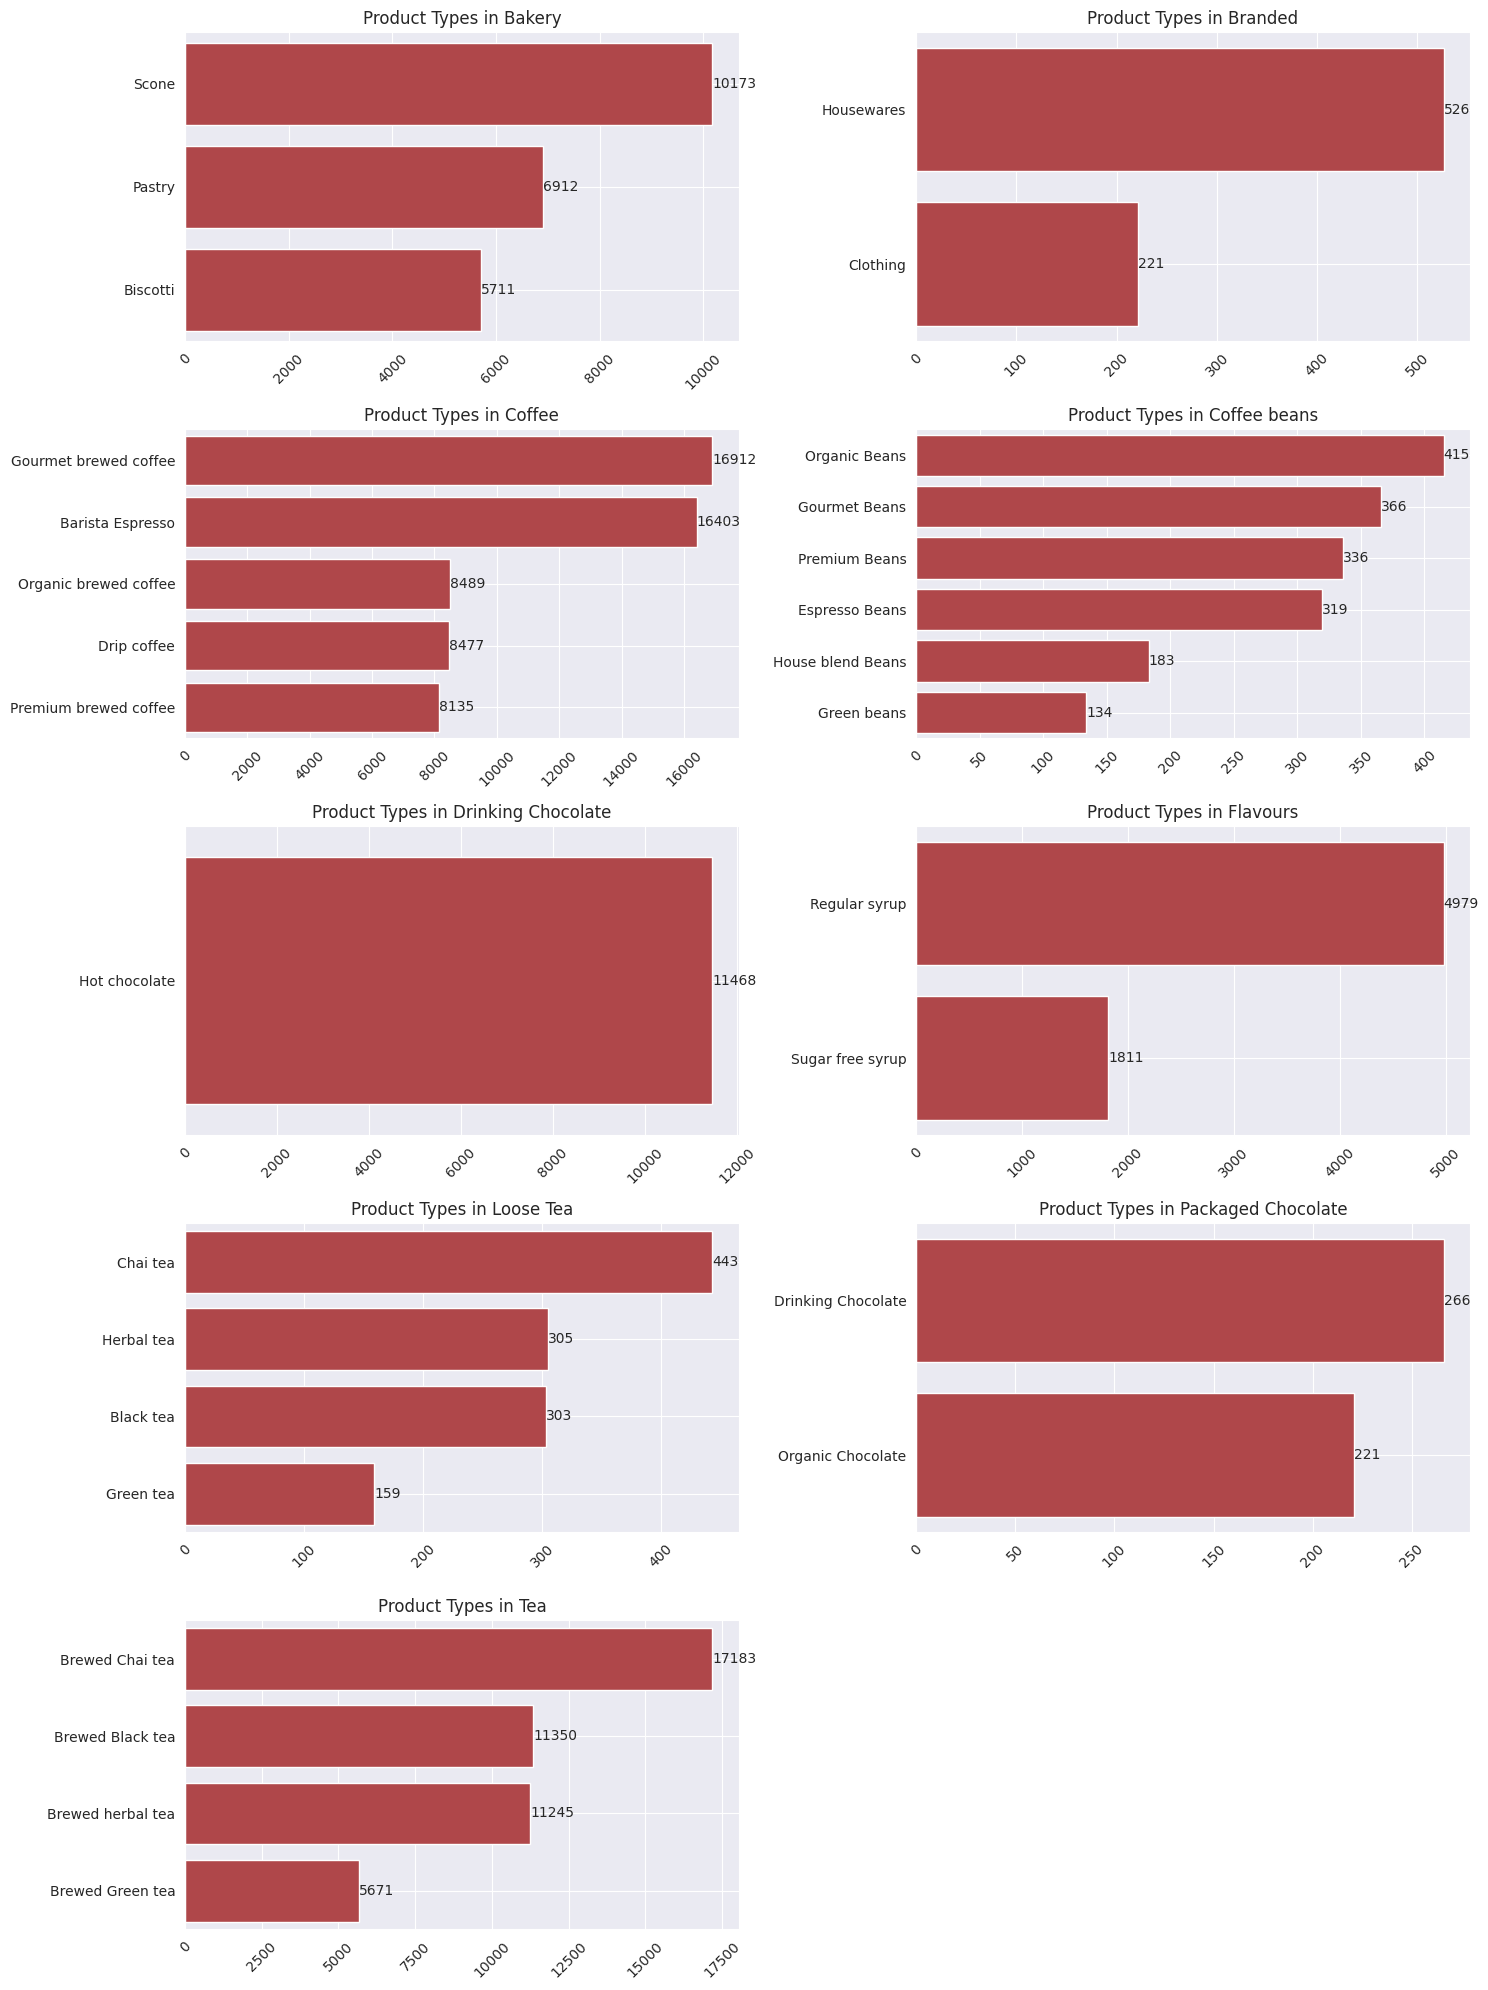

In [ ]:
# Assuming 'counts' is the DataFrame obtained from your groupby operation
counts = data.groupby(["product_category", "product_type"]).size().reset_index(name = "count")

# Get unique categories
categories = counts['product_category'].unique()

# Create subplots for each category in a 4x2 grid
fig, axes = plt.subplots(5, 2, figsize = (15, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for each category
    subset = counts[counts['product_category'] == category]

    # Sort the data by 'count' column in descending order
    subset = subset.sort_values('count', ascending = False)

    # Create a bar plot for each category with sorted order
    sns.barplot(x = 'count', y = 'product_type', data = subset, ax = axes[i], order = subset['product_type'])
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(True)

    # Adding bar labels
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha = 'left', va = 'center')

# Hide extra subplots if there are fewer categories than subplots
for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Discovering product_detail column

In [ ]:
# see unique values

data["product_detail"].unique()

array(['Ethiopia Rg', 'Spicy Eye Opener Chai Lg', 'Dark chocolate Lg',
       'Our Old Time Diner Blend Sm', 'Oatmeal Scone',
       'Columbian Medium Roast Sm', 'Latte Rg', 'Dark chocolate Rg',
       'Spicy Eye Opener Chai Rg', 'Ethiopia Lg', 'Earl Grey Lg',
       'Ouro Brasileiro shot', 'Serenity Green Tea Lg',
       'Jumbo Savory Scone', 'Lemon Grass Rg',
       'Sustainably Grown Organic Lg', 'Hazelnut Biscotti', 'Cappuccino',
       'Lemon Grass Lg', 'Chocolate Chip Biscotti', 'Peppermint Lg',
       'Chocolate Croissant', 'Latte', 'Brazilian Rg', 'Brazilian Lg',
       'Columbian Medium Roast Rg', 'Morning Sunrise Chai Rg',
       'Morning Sunrise Chai Lg', 'Our Old Time Diner Blend Lg',
       'Sustainably Grown Organic Rg', 'Scottish Cream Scone ',
       'Peppermint Rg', 'English Breakfast Rg',
       'Our Old Time Diner Blend Rg', 'Serenity Green Tea Rg',
       'Brazilian Sm', 'Jamaican Coffee River Sm',
       'Jamaican Coffee River Lg', 'Ginger Biscotti',
       'Tradit

I decided to Drop this column, it's redundant since the same information is presented more effectively in the other columns

In [ ]:
# drop column

data.drop(columns = "product_detail", inplace = True)

In [ ]:
# add new column revenue

data["Total revenue"] = data["transaction_qty"] * data["unit_price"]

In [ ]:
# see sample of data

data.sample(5)

,transaction_qty,store_location,unit_price,product_category,product_type,year,month,day,hour,Total revenue
20018,1,Hell's Kitchen,3.75,Coffee,Barista Espresso,2023,February,Sunday,17,3.75
27659,1,Lower Manhattan,3.00,Tea,Brewed Black tea,2023,February,Saturday,16,3.00
101795,1,Astoria,3.50,Drinking Chocolate,Hot chocolate,2023,May,Saturday,12,3.50
64634,1,Lower Manhattan,3.75,Bakery,Pastry,2023,April,Wednesday,14,3.75
11405,1,Hell's Kitchen,2.50,Tea,Brewed herbal tea,2023,January,Friday,19,2.50


## **Columns Insights📊📉📈**

Year, Sales exclusively from 2023.

Month, Most sales within a six-month period

Hour, Most sales were from 8 am to 11 pm

Transaction quantity, Most sales were singles followed by 2 lots
Stores, The sales rates of the three stores were similar, with the most significant difference observed at the Hell's Kitchen store
Unit price, Price distribution is positively skewed, We understand from this that most Coffee have lower prices,while a few Coffee have higher prices

**Category :**
it's evident that the three stores offer a wide range of services.
Coffee stands as the best-selling product.
Tea also exhibits a high sales rate.

**product type :**
In the Bakery category, the most sold item is the scone
In the Branded category, the best-selling item is Housewares
In the Coffee category, the best-selling item is Gourmet brewed coffee
In the Coffee beans category, the best-selling item is Organic Beans
The Drinking Chocolate category solely offers hot chocolate
Regular syrup are the top-selling items in the Flavours category
In the Loose Tea category, the best-selling item is Chai tea
In the Packaged Chocolate category, the best-selling item is Drinking Chocolate
In the Tea category, the best-selling item is Brewed Chai tea

## **Bivariate Analysis & Visualizations📊📉📈**


**Store vs. Transaction Quantity**

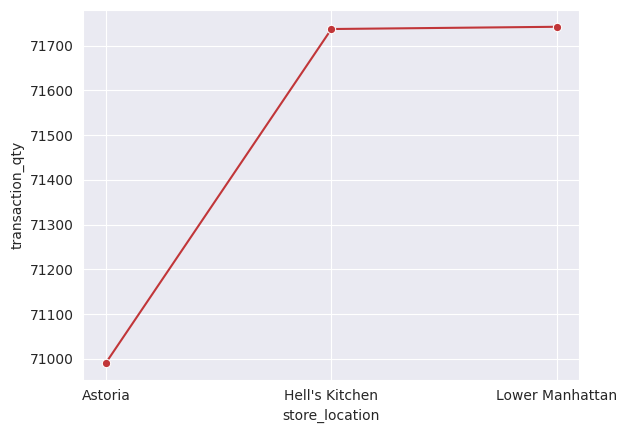

In [ ]:
# Calculate sum of transaction quantities for each store_location
sum_transaction_qty = data.groupby("store_location")["transaction_qty"].sum().reset_index()

# create line plot
sns.lineplot(x = "store_location", y = "transaction_qty", data = sum_transaction_qty, marker = "o")
plt.show()

Hell's Kitchen and Lower Manhattan recorded the highest total transaction quantities, both exceeding 71,700, while Astoria had slightly fewer, around 71,000, indicating relatively consistent performance across locations with Hell's Kitchen showing a slight edge.

**Store vs. Total Revenue**

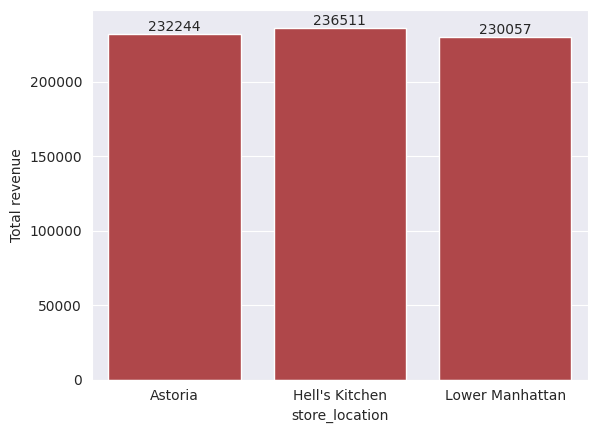

In [ ]:
# Calculate total revenue for each store_location
revenue = data.groupby("store_location")["Total revenue"].sum().reset_index()

# create bar plot
ax = sns.barplot(x = "store_location", y = "Total revenue", data = revenue)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')

plt.show()


Hell's Kitchen generated the highest total revenue (236,511), followed closely by Astoria (232,244), while Lower Manhattan had the lowest (230,057), indicating all three stores performed similarly in revenue with slight variations.

**Store vs. Product Category Sales**

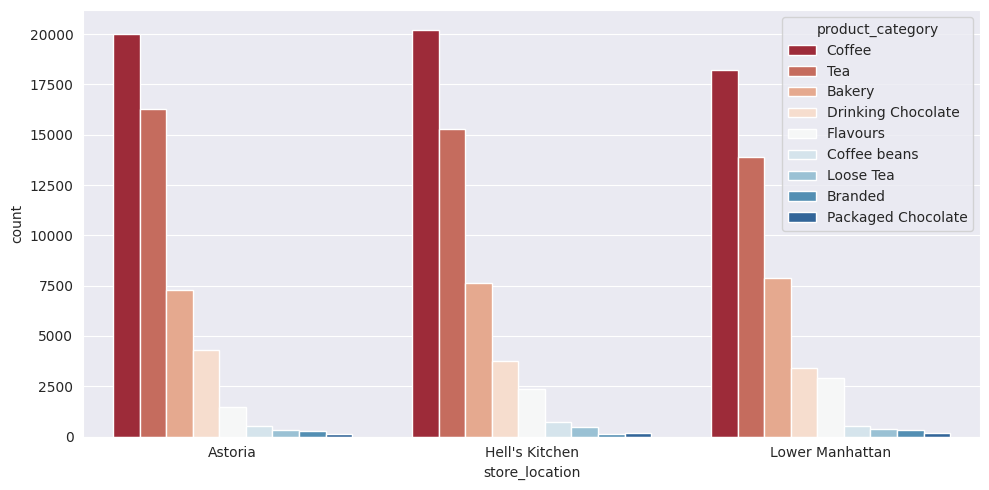

In [ ]:
# Calculate number of product categories at each store location
popular_products = data.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot
sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "RdBu")

plt.tight_layout()
plt.show()


Astoria Store :

The highest selling product category is Coffee with a count of 20,025 units
Following Coffee, Tea stands as the second most popular category with a count of 16,260 units
Other categories like Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Branded, and Packaged Chocolate have varying counts, ranging from 7289 to 110 units, in descending order


Hell's Kitchen Store :

Similar to Astoria, Coffee leads in sales, amounting to 20,187 units
Tea follows closely as the second most popular category with 15,277 units
Other categories, such as Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Packaged Chocolate, Branded, and Packaged Chocolate, have counts ranging from 7617 to 119 units


Lower Manhattan Store :

Coffee is again the top-selling category with 18,204 units
Tea follows with 13,912 units
Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Branded, Packaged Chocolate have counts ranging from 7890 to 180 units, in descending order

**Store vs. Transaction Quantity Frequency**

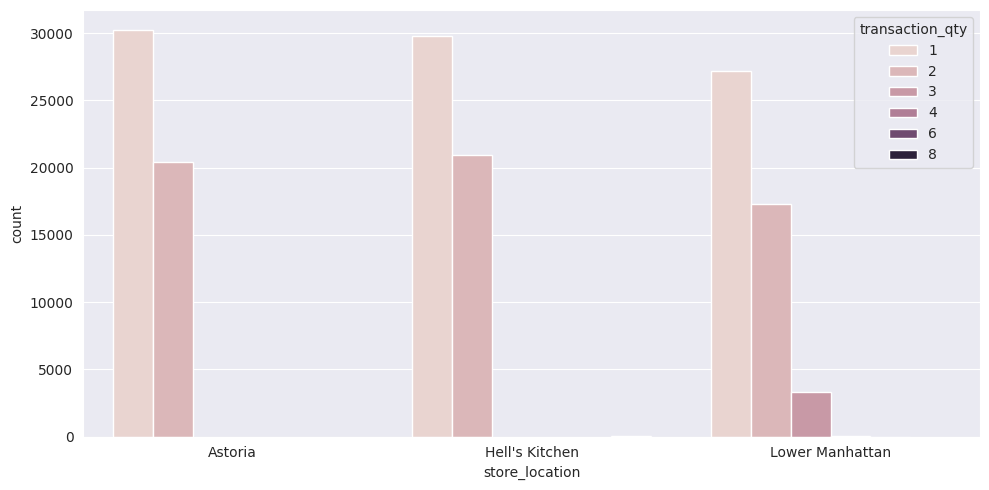

In [ ]:
# grouped 'store_location' and 'transaction_qty' as columns
grouped_data = data.groupby("store_location")["transaction_qty"].value_counts().reset_index(name = "count")

# set figure size
plt.figure(figsize=(10, 5))

# Create bar plot
sns.barplot(x = "store_location", y = "count", hue = "transaction_qty", data = grouped_data)

plt.tight_layout()
plt.show()


Astoria Store :

The most frequent transaction quantity observed is 1, with a count of 30,207 instances
The second most frequent transaction quantity is 2, noted 20,392 times


Hell's Kitchen Store:

The most frequent transaction quantity observed is 1, noted 29,793 times
The second most frequent transaction quantity is 2, observed 20,932 times
Additionally, there are 8 transactions with a quantity of 8


Lower Manhattan Store:

The most frequent transaction quantity observed is 1, recorded 27,159 times.
The second most frequent transaction quantity is 2, seen 17,318 times.
There are occurrences of transaction quantities 3, 4, and 6, but they are less frequent compared to quantities 1 and 2

**Store vs. Hourly Sales**

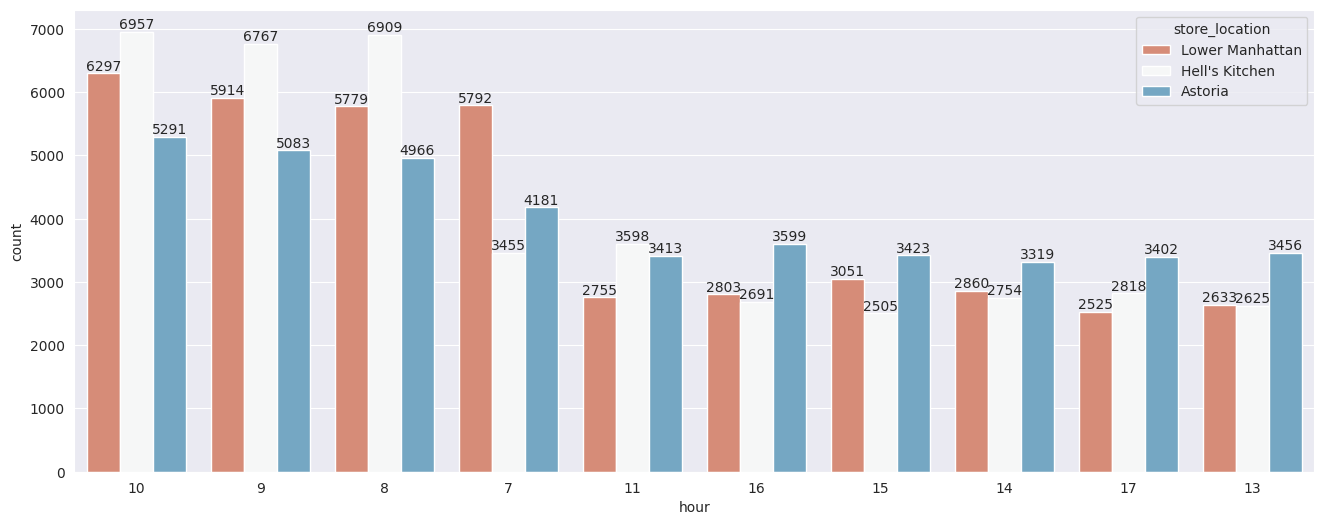

In [ ]:
# set figure size
plt.figure(figsize=(16, 6))

# call function i create it in cell 12
count_plot(x_axis = "hour", hue = "store_location", top = 10)

Astoria Store :

Peak hours are from 9 AM to 10 AM, and from 4 PM to 5 PM, with counts ranging between 5,083 and 5,291 during these periods
The least busy hours are from 7 AM to 8 AM, with counts ranging between 4,181 and 4,966


Hell's Kitchen Store :

Busiest hours are from 8 AM to 10 AM, with counts ranging between 6,767 and 6,909
The least busy hours are from 6 AM to 7 AM and from 6 PM to 8 PM


Lower Manhattan Store :

Peak hours are from 9 AM to 10 AM, with a count of 6,297, and from 2 PM to 3 PM, with a count of 3,051
The least busy hours are from 7 PM to 8 PM, with counts dropping to 75 and 125

**Product Type vs. Revenue**

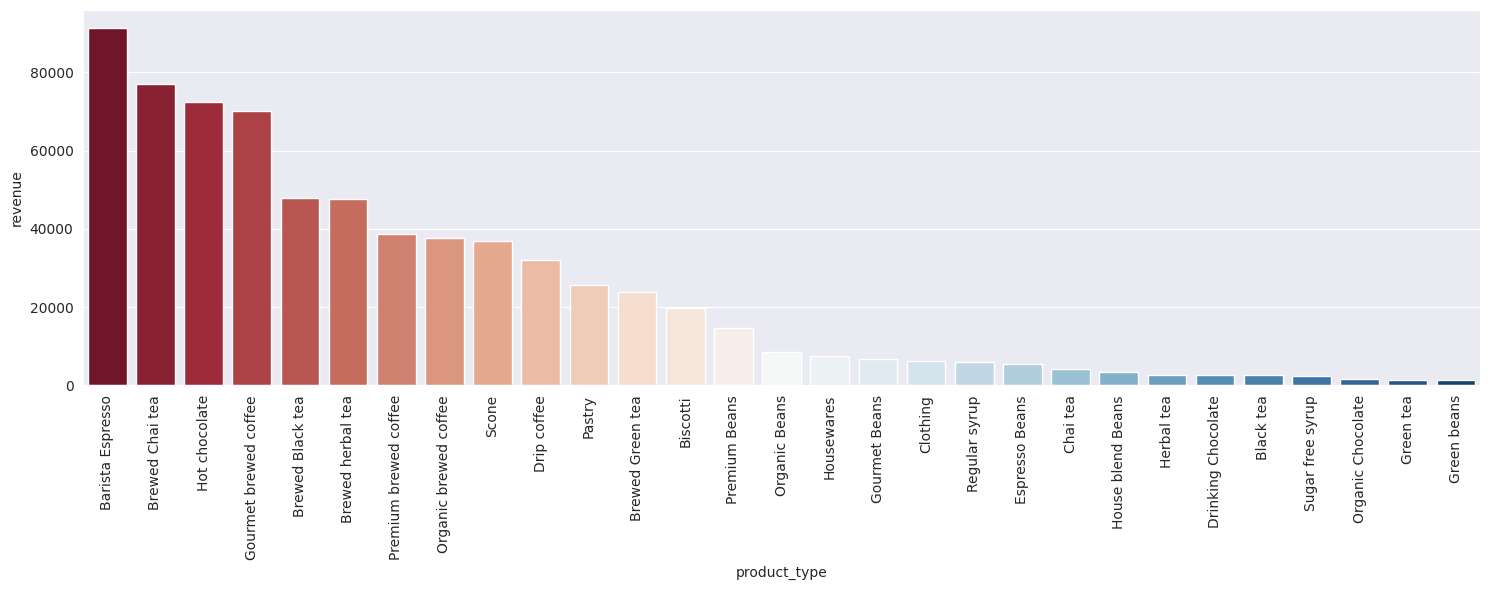

In [ ]:
# grouped product_type' and 'Total revenue'
category_revenue = data.groupby("product_type")["Total revenue"].sum().reset_index(name = "revenue")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'revenue', ascending = False)

# set figure size
plt.figure(figsize = (15,6))

# create bar plot
sns.barplot(x = "product_type", y = "revenue", data = category_revenue, palette = "RdBu")

# set x-axis rotation
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()


Top Revenue Product Types :

Barista Espresso with a revenue of 91,406.20
Brewed Chai tea with a revenue of 77,081.95
Hot chocolate with a revenue of 72,416.00
Gourmet brewed coffee with a revenue of 70,034.60
Brewed Black tea with a revenue of 47,932.00


Lowest Revenue Product Types :

Organic Chocolate with a revenue of 1,679.60
Green tea with a revenue of 1,470.75
Green beans with a revenue of 1,340.00


Other Observations :

Various products contribute to revenue across different ranges, with a mix of beverages (like teas, coffees) and snacks (biscotti, pastries).
Coffee-related products, such as various brews and espresso variants, hold prominent positions in revenue generation.
The lowest revenue-generating products are predominantly related to tea and specific beverage variants.

**Month vs. Revenue**

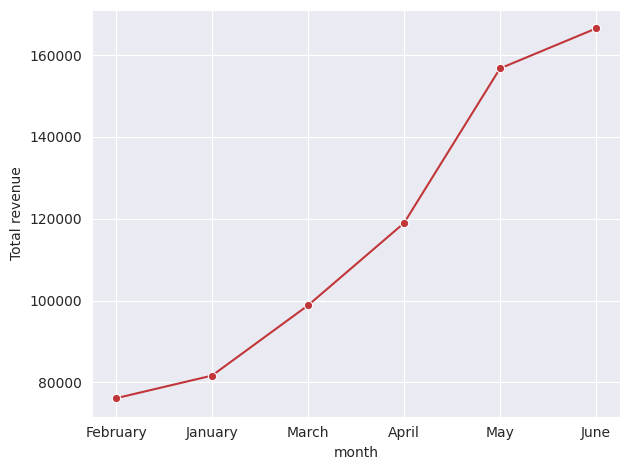

In [ ]:
# Grouping by month and summing the revenue
monthly_revenue  = data.groupby("month")["Total revenue"].sum().reset_index().sort_values(by = "Total revenue")

# create line plot
sns.lineplot(x = "month", y = "Total revenue", data = monthly_revenue , marker = "o")

plt.tight_layout()
plt.show()

June had the highest total revenue, reaching 166,485.88, making it the most profitable month.
May followed closely behind with a total revenue of 156,727.76, indicating strong performance.
April and March also performed well, generating revenues of 118,941.08 and 98,834.68, respectively.
January and February had comparatively lower revenue figures at 81,677.74 and 76,145.19, respectively.